In [14]:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy import interpolate
import os
import pandas as pd
plt.style.use('../report.mplstyle')
import csv
import re

In [3]:
files = os.listdir('data/')

for file in files:
    if file.endswith('.csv'):
        os.rename('data/'+file, 'data/moku_csv/'+file)

    elif file.endswith('.png'):
        os.rename('data/'+file, 'data/moku_images/'+file)

def float_array_convert(array):
    return np.array([float(i) for i in array])

lp_data = pd.read_csv('data/csv/lp_data.csv',sep = ',')
hp_data = pd.read_csv('data/csv/hp_data.csv',sep = ',')

lp_peak_to_peak, lp_phase, lp_freq = lp_data['peaktopeak'], lp_data['phase'], lp_data['frequency']
hp_peak_to_peak, hp_phase, hp_freq = hp_data['peaktopeak'], hp_data['phase'], hp_data['frequency']

lp_peak_to_peak, lp_phase, lp_freq = float_array_convert(lp_peak_to_peak), float_array_convert(lp_phase), float_array_convert(lp_freq)
hp_peak_to_peak, hp_phase, hp_freq = float_array_convert(hp_peak_to_peak), (float_array_convert(hp_phase))-np.pi/2, float_array_convert(hp_freq)


[ 0.09343982  0.09343982  0.14804608  0.16927649  0.17991119  0.20744459
  0.22882086  0.59027302  1.15289301  1.83351721  2.57087652  3.31540194
  4.04495743  4.74792901  5.45405594  6.11491776  6.7372937   8.73512598
 12.96793855 18.62144777 22.00577811]


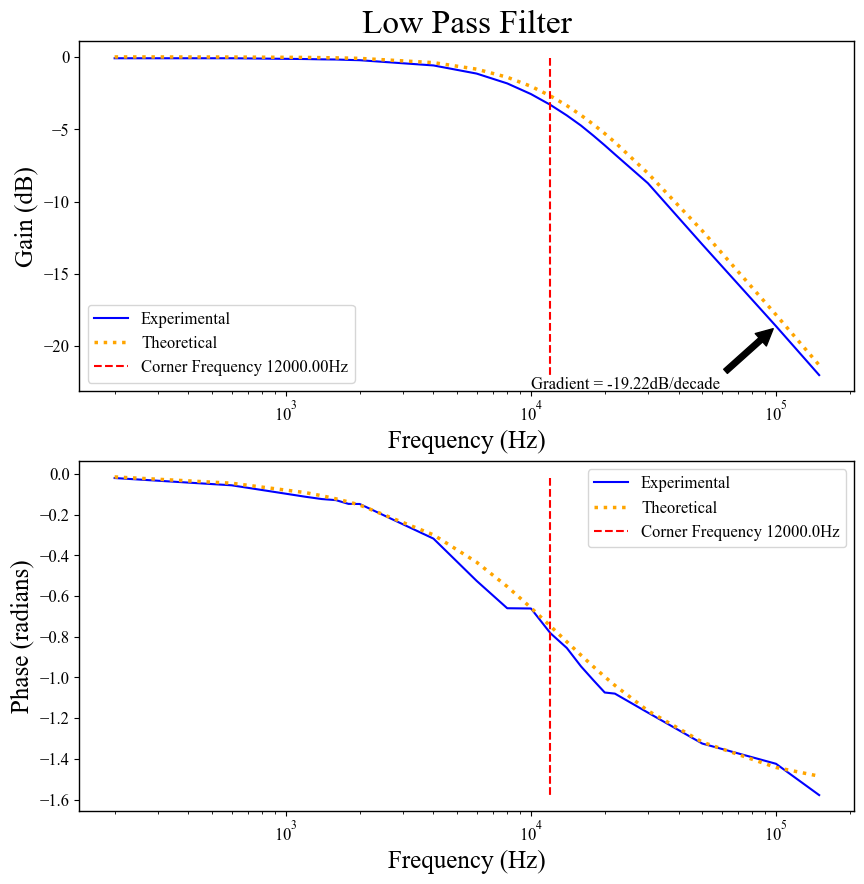

In [4]:
def arctan(x,r,c):
    return -np.arctan(x*r*c)

def corner_freq(x,y):
    return np.full_like(y,x[np.argmin(np.abs(y+3))])

def gradient(x,y):
    return np.gradient(x,y)

lp_resistance = 15000
lp_capacitance = 0.82e-9

log_lp_gain = 20*np.log10(lp_peak_to_peak)
lp_omega = (lp_freq*2*np.pi)
log_lp_omega = np.log10(lp_omega)
log_lp_theo_gain = 20*np.log10(1/np.sqrt(1+(lp_omega*lp_resistance*lp_capacitance)**2))
lp_theo_phase = arctan(lp_omega,lp_resistance,lp_capacitance)
lp_corner_freq = corner_freq(lp_freq,log_lp_gain)

print((np.abs(log_lp_gain)))

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(lp_freq,log_lp_gain, label = 'Experimental', color = 'blue')
plt.plot(lp_freq,log_lp_theo_gain, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(lp_corner_freq,log_lp_gain, label = f'Corner Frequency {lp_corner_freq[0]:.2f}Hz', color = 'red', linestyle = '--', linewidth = 1.5)
plt.annotate(f'Gradient = {gradient(log_lp_gain,log_lp_omega)[-1]:.2f}dB/decade', xy = (lp_freq[-2],log_lp_gain[-2]), arrowprops=dict(facecolor = 'black', shrink = 0.05,), xytext = (lp_freq[-2]-90000,log_lp_gain[-2]-4.3))
plt.xlabel(r'Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Gain (dB)')
plt.title('Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot(lp_freq,lp_phase, label = 'Experimental', color = 'blue')
plt.plot(lp_freq,lp_theo_phase, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(lp_corner_freq,lp_phase, label = f'Corner Frequency {lp_corner_freq[0]}Hz', color = 'red', linestyle = '--', linewidth = 1.5)
plt.xlabel(r'Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()



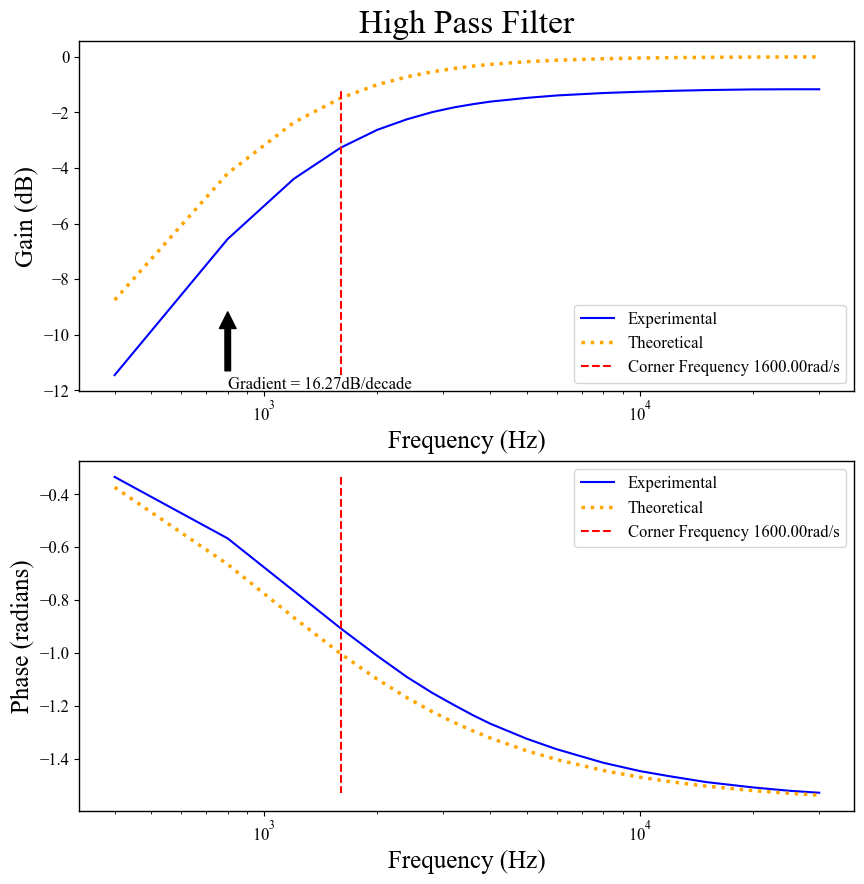

In [5]:
hp_resistance = 156000
hp_capacitance = 1e-9

log_hp_gain = 20*np.log10(hp_peak_to_peak)
hp_omega = (hp_freq*2*np.pi)
log_hp_omega = np.log10(hp_omega)
log_hp_theo_gain = 20*np.log10(hp_omega*hp_resistance*hp_capacitance/(np.sqrt(1+(hp_omega*hp_resistance*hp_capacitance)**2)))
hp_theo_phase = arctan(hp_omega,hp_resistance,hp_capacitance)
hp_corner_freq = corner_freq(hp_freq,log_hp_gain)


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(hp_freq,log_hp_gain, label = 'Experimental', color = 'blue')
plt.plot(hp_freq,log_hp_theo_gain, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_corner_freq,log_hp_gain, label = f'Corner Frequency {hp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.annotate(f'Gradient = {gradient(log_hp_gain,log_hp_omega)[0]:.2f}dB/decade', xy = (hp_freq[1]-0.165,log_hp_gain[1]-2.5), arrowprops=dict(facecolor = 'black', shrink = 0.05,), xytext = (hp_freq[1]+0.1,log_hp_gain[1]-5.4))
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Gain (dB)')
plt.title('High Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot(hp_freq,hp_phase, label = 'Experimental', color = 'blue')
plt.plot(hp_freq,hp_theo_phase, label = 'Theoretical', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.plot(hp_corner_freq,hp_phase, label = f'Corner Frequency {hp_corner_freq[0]:.2f}rad/s', color = 'red', linestyle = '--', linewidth = 1.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()


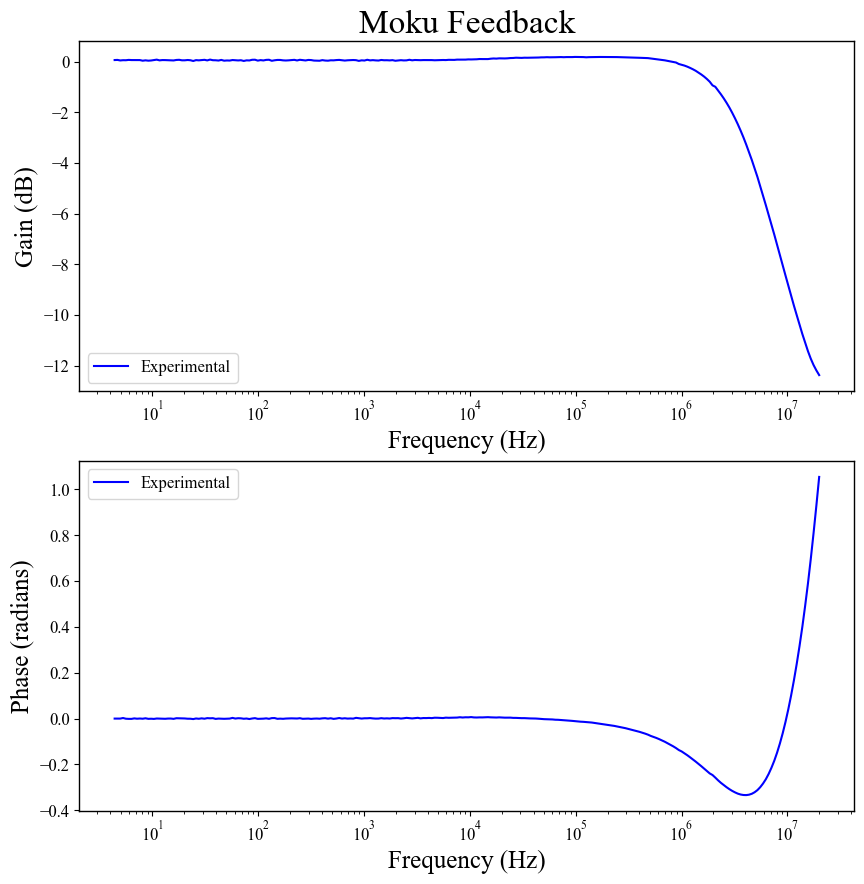

In [6]:
def load_data(file):
    data = pd.read_csv(file, delimiter = ',', skiprows = 2)
    data.columns = ['freq','gain','phase']
    data['phase'] = data['phase']*(np.pi/180)
    return data

moku_feedback = load_data('data/moku_csv/moku_itself_data.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Experimental', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Gain (dB)')
plt.title('Moku Feedback')
plt.legend()
plt.subplot(2,1,2)
plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Experimental', color = 'blue')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()


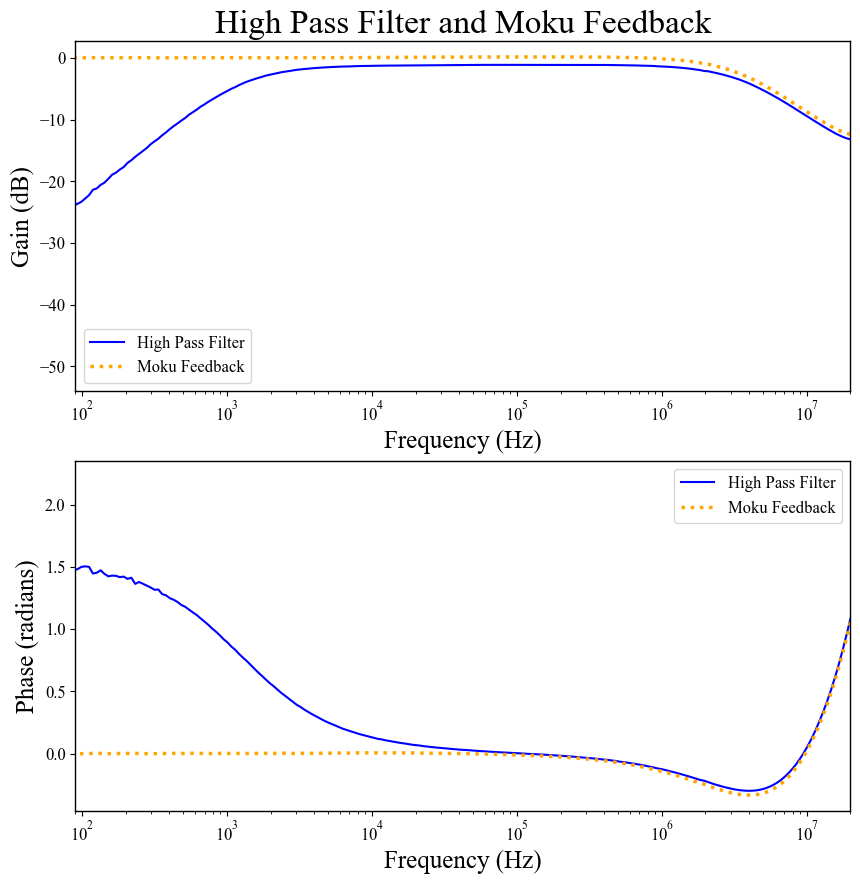

In [7]:

hp_freq_res = load_data('data/moku_csv/HP_freq_res_data.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((hp_freq_res['freq']),hp_freq_res['gain'], label = 'High Pass Filter', color = 'blue')
plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(9e1,2e7)
plt.ylabel('Gain (dB)')
plt.title('High Pass Filter and Moku Feedback')
plt.legend()
plt.subplot(2,1,2)
plt.plot((hp_freq_res['freq']),hp_freq_res['phase'], label = 'High Pass Filter', color = 'blue')
plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(9e1,2e7)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()


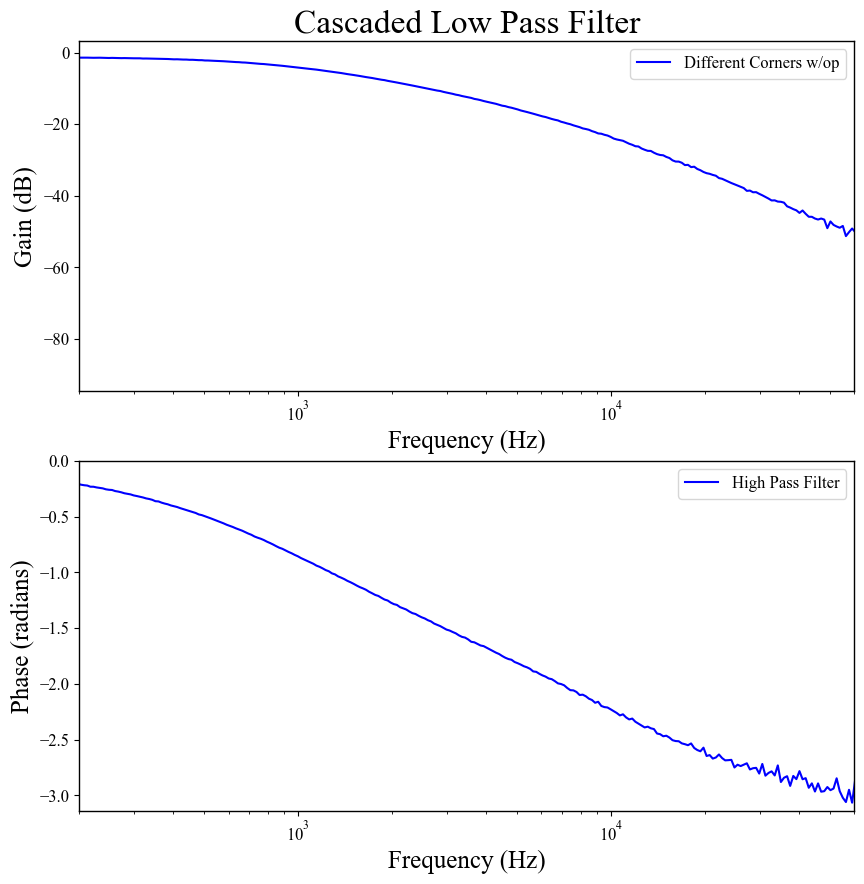

In [8]:
casc_lowpass_diff_op = load_data('data/moku_csv/cascadedlowpass.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((casc_lowpass_diff_op['freq']),casc_lowpass_diff_op['gain'], label = 'Different Corners w/op', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylabel('Gain (dB)')
plt.title('Cascaded Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot((casc_lowpass_diff_op['freq']),casc_lowpass_diff_op['phase'], label = 'High Pass Filter', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylim(-np.pi,0)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

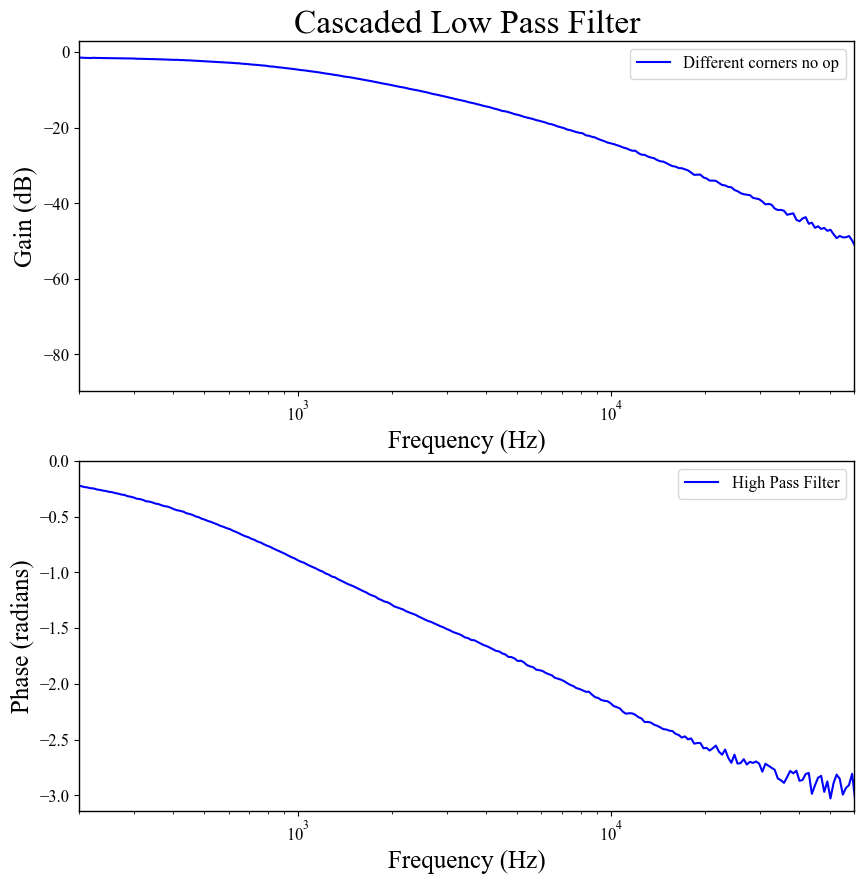

In [9]:
low_diff = load_data('data/moku_csv/casclowpassnoop.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((low_diff['freq']),low_diff['gain'], label = 'Different corners no op', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylabel('Gain (dB)')
plt.title('Cascaded Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot((low_diff['freq']),low_diff['phase'], label = 'High Pass Filter', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylim(-np.pi,0)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

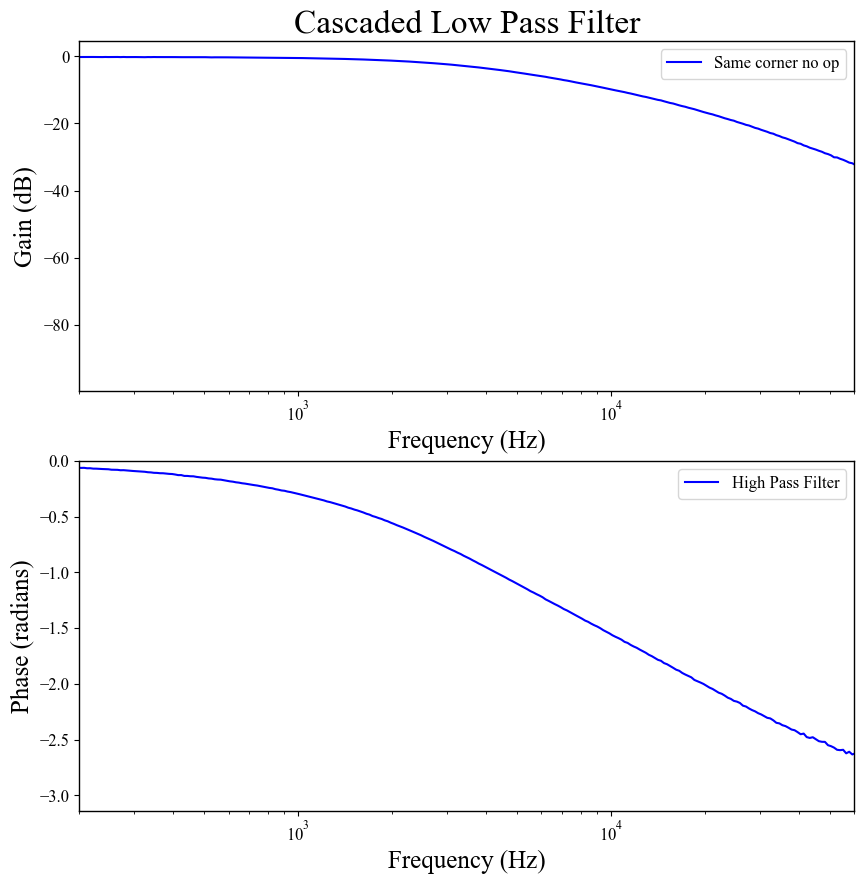

In [10]:
low_same = load_data('data/moku_csv/casc_lowpass_same_corner.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((low_same['freq']),low_same['gain'], label = 'Same corner no op', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylabel('Gain (dB)')
plt.title('Cascaded Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot((low_same['freq']),low_same['phase'], label = 'High Pass Filter', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylim(-np.pi,0)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

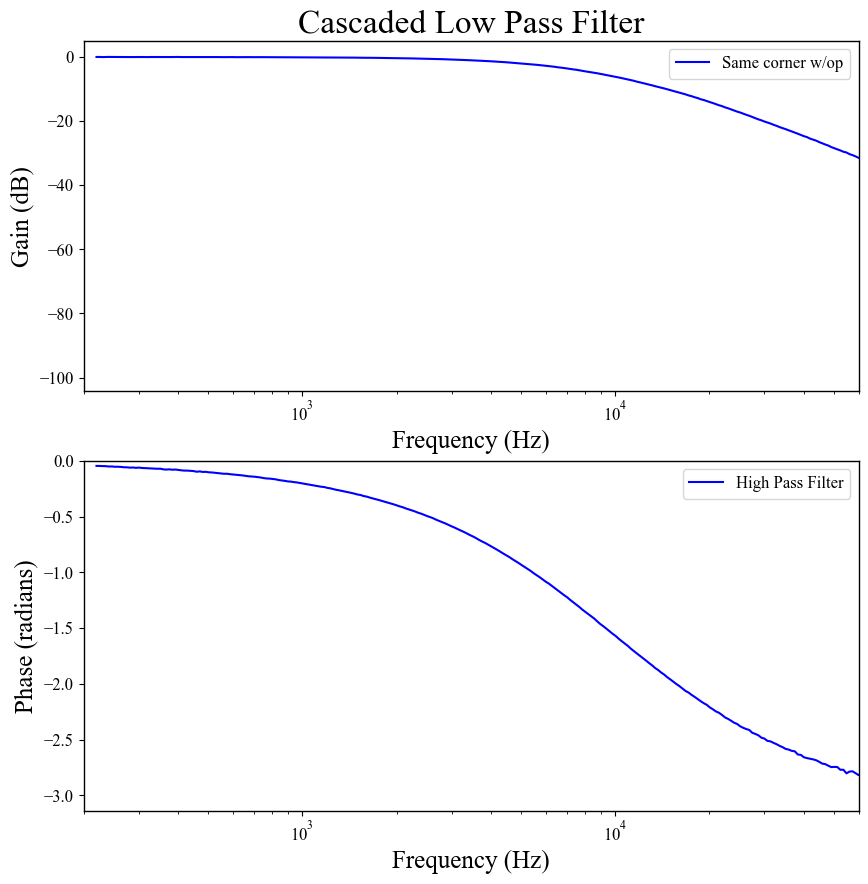

In [11]:
low_same_op = load_data('data/moku_csv/casc_lowpass_op_same_corner.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((low_same_op['freq']),low_same_op['gain'], label = 'Same corner w/op', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylabel('Gain (dB)')
plt.title('Cascaded Low Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot((low_same_op['freq']),low_same_op['phase'], label = 'High Pass Filter', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylim(-np.pi,0)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

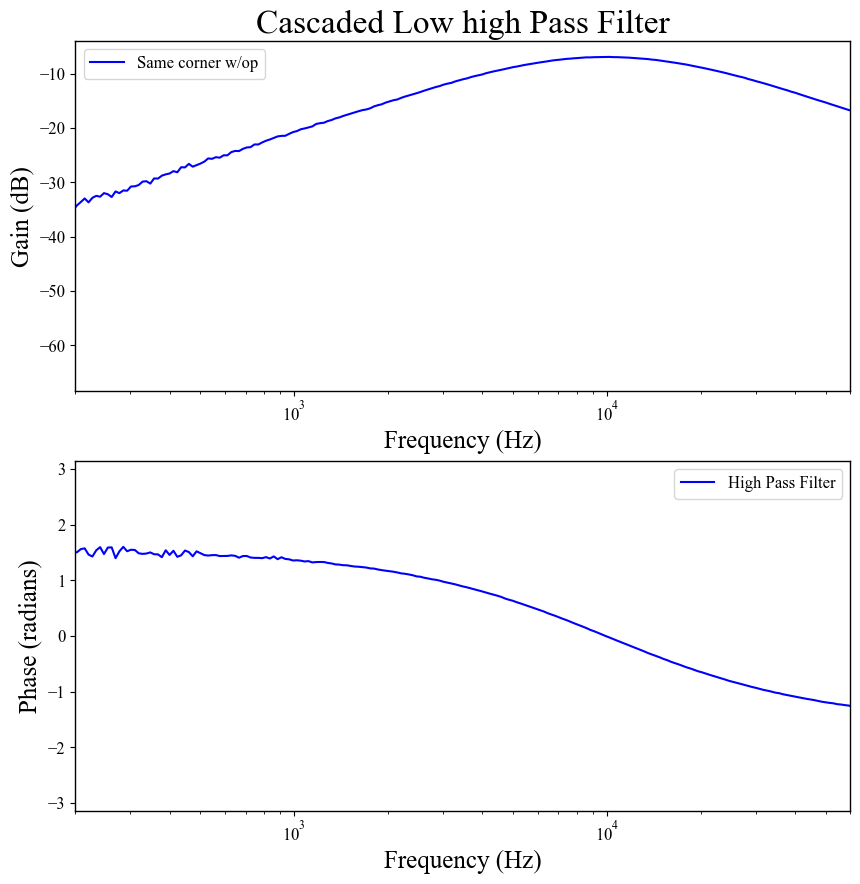

In [12]:
lowhigh_same_op = load_data('data/moku_csv/casc_low_high_opamp_samecron.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((lowhigh_same_op['freq']),lowhigh_same_op['gain'], label = 'Same corner w/op', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylabel('Gain (dB)')
plt.title('Cascaded Low high Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot((lowhigh_same_op['freq']),lowhigh_same_op['phase'], label = 'High Pass Filter', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylim(-np.pi,np.pi)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

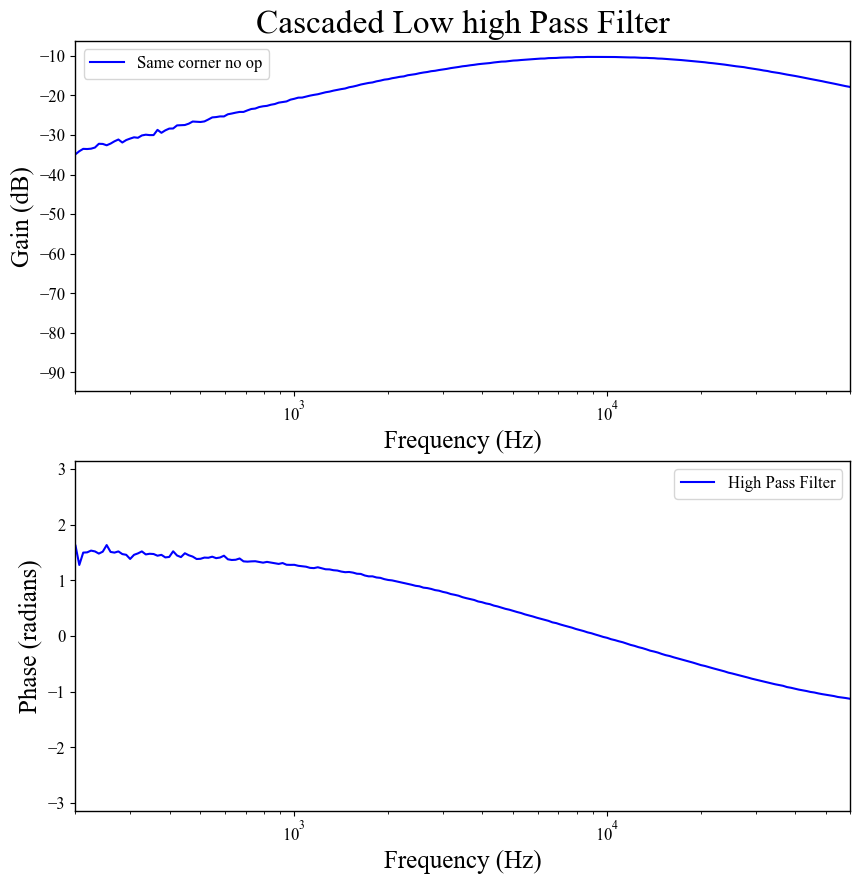

In [13]:
lowhigh_same = load_data('data/moku_csv/casc_low_high_samecron.csv')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot((lowhigh_same['freq']),lowhigh_same['gain'], label = 'Same corner no op', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylabel('Gain (dB)')
plt.title('Cascaded Low high Pass Filter')
plt.legend()
plt.subplot(2,1,2)
plt.plot((lowhigh_same['freq']),lowhigh_same['phase'], label = 'High Pass Filter', color = 'blue')
# plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(2e2,6e4)
plt.ylim(-np.pi,np.pi)
plt.ylabel('Phase (radians)')
plt.legend()
plt.show()

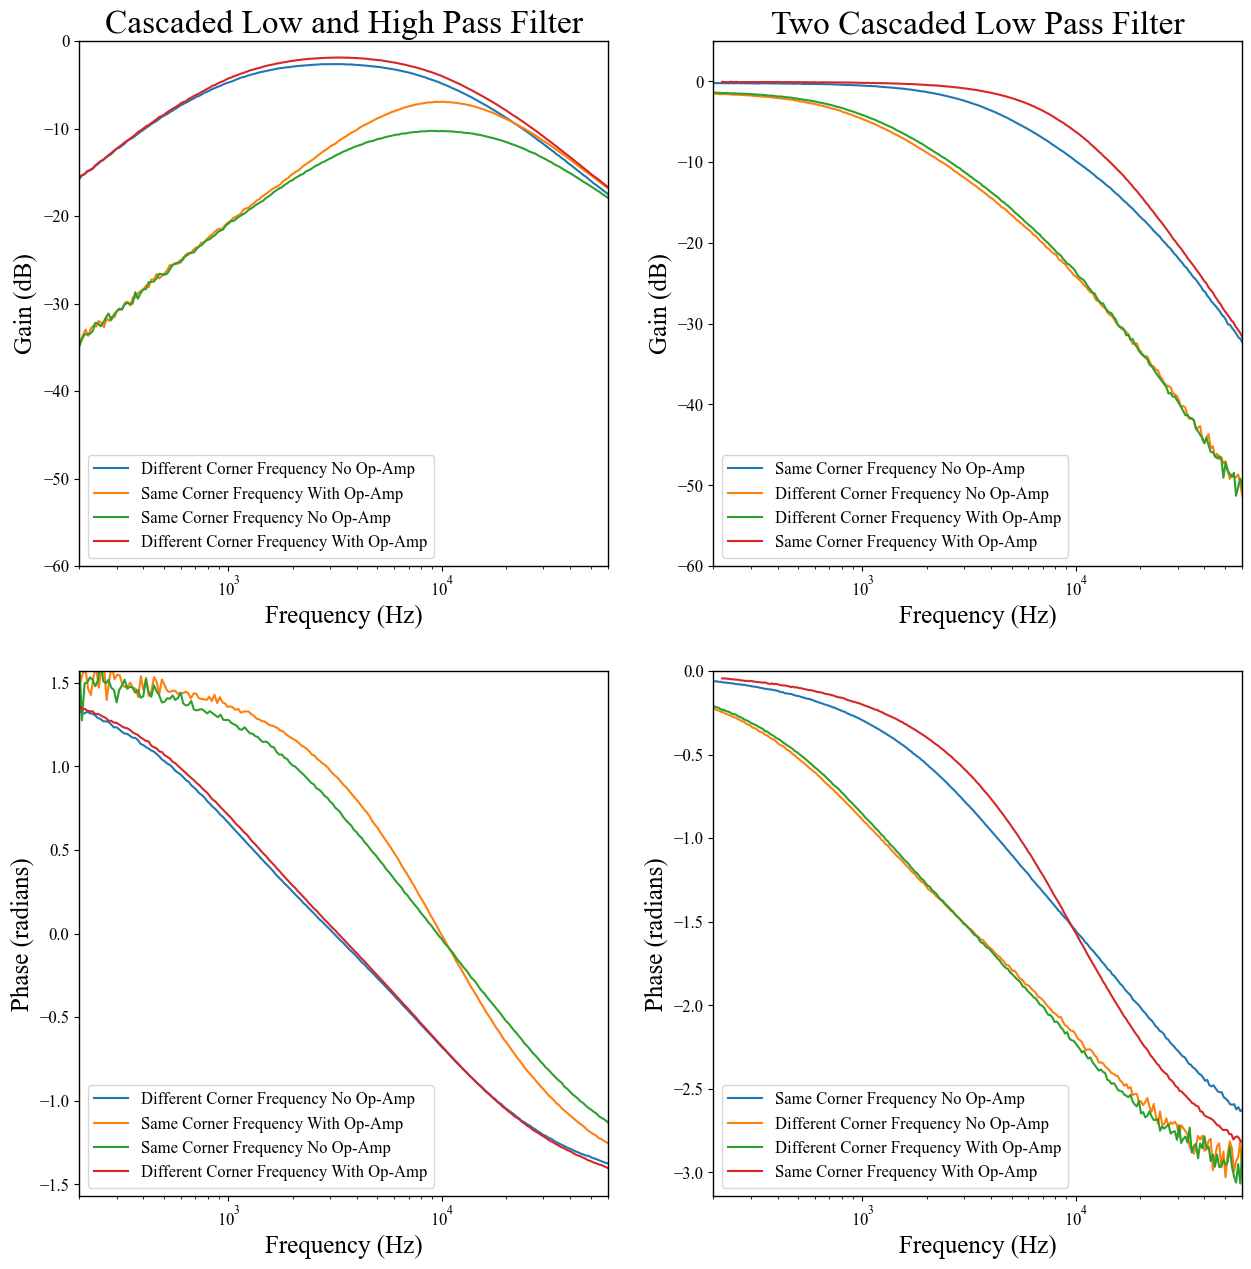

In [41]:
Path = 'data/moku_csv/'
plt.figure(figsize=(15,15))
files = os.listdir(Path)

for file in files:
    if re.search('high',file):
        
        data = load_data(Path+file)
        labels = (pd.read_csv(Path+file,nrows = 0)).columns[0]
        plt.subplot(2,2,1)
        plt.plot((data['freq']),data['gain'], label = labels)
        # plt.plot((moku_feedback['freq']),moku_feedback['gain'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-60,0)
        plt.ylabel('Gain (dB)')
        plt.title('Cascaded Low and High Pass Filter')
        plt.legend()
        plt.subplot(2,2,3)
        plt.plot((data['freq']),data['phase'], label = labels)
        # plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-np.pi/2,np.pi/2)
        plt.ylabel('Phase (radians)')
        plt.legend()


    elif file.startswith('casc_lowpass'):

        data = load_data(Path+file)
        labels = (pd.read_csv(Path+file,nrows = 0)).columns[0]
        plt.subplot(2,2,2)
        plt.plot((data['freq']),data['gain'], label = labels)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-60,5)
        plt.ylabel('Gain (dB)')
        plt.title('Two Cascaded Low Pass Filter')
        plt.legend()
        plt.subplot(2,2,4)
        plt.plot((data['freq']),data['phase'],label = labels)
        # plt.plot((moku_feedback['freq']),moku_feedback['phase'], label = 'Moku Feedback', color = 'orange', linestyle = ':', linewidth = 2.5)
        plt.xlabel('Frequency (Hz)')
        plt.xscale('log')
        plt.xlim(2e2,6e4)
        plt.ylim(-np.pi,0)
        plt.ylabel('Phase (radians)')
        plt.legend()
plt.show()

